<a href="https://colab.research.google.com/github/Priyankaa2002/My-Portfolio/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
vocab_size = 10000
max_len = 200

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=3,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 125s 776ms/step - accuracy: 0.6805 - loss: 0.5854 - val_accuracy: 0.8428 - val_loss: 0.3691
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 119s 761ms/step - accuracy: 0.8625 - loss: 0.3326 - val_accuracy: 0.8344 - val_loss: 0.3755
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 124s 791ms/step - accuracy: 0.8928 - loss: 0.2764 - val_accuracy: 0.8552 - val_loss: 0.3574


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 85.21%


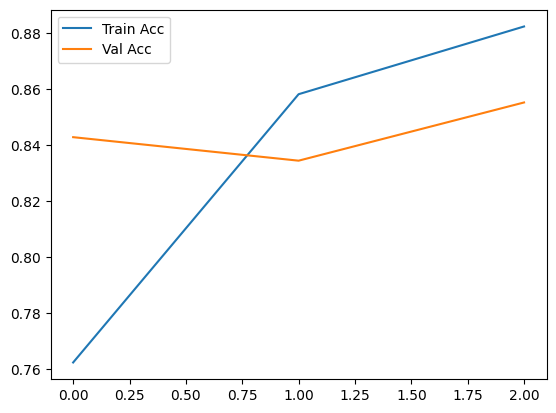

In [ ]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.show()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step
              precision    recall  f1-score   support

           0       0.88      0.82      0.85     12500
           1       0.83      0.89      0.86     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

